In [1180]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Features

In [1076]:
set(train_df.columns)

{'Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket'}

# Title

Extract title from name and make a new feature

In [1181]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 

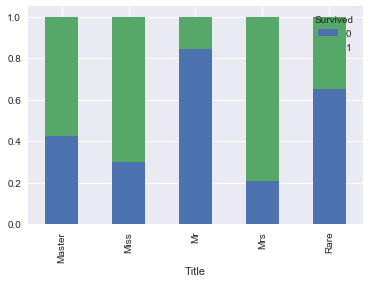

In [1182]:
tab = pd.crosstab(train_df['Title'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

In [1183]:
titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Rare']
for dataset in combine:
    for t in titles:
        dataset[t] = dataset['Title'] == t

# SibSp and Parch

In [1225]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    dataset['IsAlone'] = dataset['FamilySize'] == 0
#     dataset['LargeFamily'] = dataset['FamilySize'] >= 4

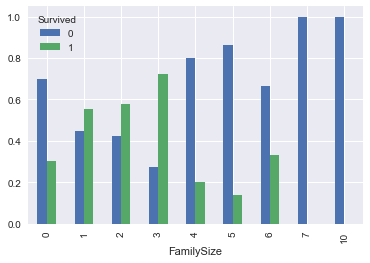

In [1187]:
tab = pd.crosstab(train_df['FamilySize'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [1188]:
for dataset in combine:
    dataset['GoodFamilySize'] = dataset['FamilySize'].apply(lambda x: x in [1, 2, 3])
    dataset['MediumFamilySize'] = dataset['FamilySize'].apply(lambda x: x in [0, 4, 5, 6])
    dataset['BadFamilySize'] = dataset['FamilySize'] >= 7

# Cabin

In [1189]:
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna(value='U')
    dataset['Cabin'] = dataset['Cabin'].str[0]

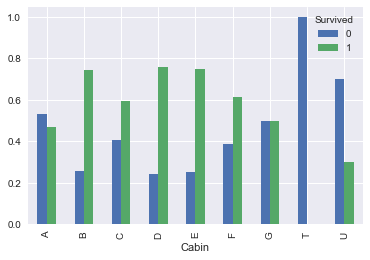

In [1190]:
tab = pd.crosstab(train_df['Cabin'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [1191]:
for dataset in combine:
    dataset['GoodCabin'] = dataset['Cabin'].apply(lambda x: x in ['B','C','D','E','F'])
    dataset['MediumCabin'] = dataset['Cabin'].apply(lambda x: x in ['A','G'])
    dataset['BadCabin'] = dataset['Cabin'].apply(lambda x: x in ['T', 'U'])

# Ticket

In [1193]:
for dataset in combine:
    dataset["TicketType"] = dataset['Ticket'].str[0]

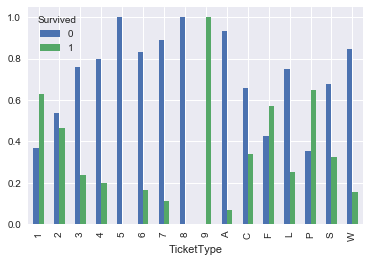

In [1194]:
tab = pd.crosstab(train_df['TicketType'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [1195]:
for dataset in combine:
    dataset['GoodTicketType'] = dataset['TicketType'].isin(['1','9','F','P'])
    dataset['MediumTicketType'] = dataset['TicketType'].isin(['2','C','S'])
    dataset['BadTicketType'] = dataset['TicketType'].isin(['3','4','5','6','7','8','A','L','W'])

In [1196]:
from collections import Counter
ticket_Counter = Counter(train_df['Ticket'])

In [1197]:
for dataset in combine:
    dataset['SharedTicket'] = dataset['Ticket'].apply(lambda x: ticket_Counter[x] > 1)

In [1091]:
test=train_df[train_df['SharedTicket'] == True].sort_values(by='Ticket')[['Ticket','Sex','Age','Survived','Name']]
# for i in test.index:
#     print(list(test.loc[i]))

In [1092]:
train_df[['SharedTicket', 'Survived']].groupby(['SharedTicket']).mean()

,Survived
SharedTicket,
False,0.297989
True,0.520349


In [1093]:
train_df.groupby(['Title'])['Age'].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Rare      48.5
Name: Age, dtype: float64

In [1094]:
train_df[train_df['Age'].isnull()].groupby(['Title']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs,Rare,FamilySize,GoodFamilySize,MediumFamilySize,BadFamilySize,GoodCabin,MediumCabin,BadCabin,TicketType,GoodTicketType,MediumTicketType,BadTicketType,SharedTicket
Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Master,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Miss,36,36,36,36,36,0,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Mr,119,119,119,119,119,0,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
Mrs,17,17,17,17,17,0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Rare,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Sex

In [1198]:
for dataset in combine:
    dataset['Male'] = dataset['Sex'] == 'male'
    dataset['Female'] = dataset['Sex'] == 'female'

# Embark

In [1199]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked_Q'] = dataset['Embarked'].apply(lambda x: x == 'Q')
    dataset['Embarked_C'] = dataset['Embarked'].apply(lambda x: x == 'C')
    dataset['Embarked_S'] = dataset['Embarked'].apply(lambda x: x == 'S')

# Pclass

In [1200]:
for dataset in combine:
    dataset['Pclass_1'] = dataset['Pclass'] == 1
    dataset['Pclass_2'] = dataset['Pclass'] == 2
    dataset['Pclass_3'] = dataset['Pclass'] == 3

# Fare

In [1201]:
test_df['Fare'] = test_df['Fare'].fillna(np.mean(test_df['Fare']))

In [1202]:
from math import log2
for dataset in combine:
    dataset.loc[dataset['Fare'] == 0, 'Fare'] = 1
    dataset['LogFare'] = dataset['Fare'].apply(log2)

In [1203]:
for dataset in combine:
    dataset['IntFare'] = dataset['LogFare'].apply(int)

# Age

In [1100]:
age_df = train_df[train_df['Age'].isnull()==False].append(test_df[test_df['Age'].isnull()==False]).copy()
pd.qcut(age_df['Age'], 3)

0      (0.169, 23.0]
1       (34.0, 80.0]
2       (23.0, 34.0]
3       (34.0, 80.0]
4       (34.0, 80.0]
6       (34.0, 80.0]
7      (0.169, 23.0]
8       (23.0, 34.0]
9      (0.169, 23.0]
10     (0.169, 23.0]
11      (34.0, 80.0]
12     (0.169, 23.0]
13      (34.0, 80.0]
14     (0.169, 23.0]
15      (34.0, 80.0]
16     (0.169, 23.0]
18      (23.0, 34.0]
20      (34.0, 80.0]
21      (23.0, 34.0]
22     (0.169, 23.0]
23      (23.0, 34.0]
24     (0.169, 23.0]
25      (34.0, 80.0]
27     (0.169, 23.0]
30      (34.0, 80.0]
33      (34.0, 80.0]
34      (23.0, 34.0]
35      (34.0, 80.0]
37     (0.169, 23.0]
38     (0.169, 23.0]
           ...      
381     (23.0, 34.0]
383    (0.169, 23.0]
385     (23.0, 34.0]
386     (23.0, 34.0]
387     (34.0, 80.0]
388    (0.169, 23.0]
389    (0.169, 23.0]
390    (0.169, 23.0]
391     (34.0, 80.0]
392    (0.169, 23.0]
393     (34.0, 80.0]
394     (23.0, 34.0]
395    (0.169, 23.0]
396     (23.0, 34.0]
397     (34.0, 80.0]
398    (0.169, 23.0]
399     (23.0

In [1101]:
young_median = age_df[age_df['Age'] <= 23]['Age'].mean()
middle_median = age_df[(age_df['Age'] <= 34) & (age_df['Age'] > 23)]['Age'].mean()
old_median = age_df[(age_df['Age'] > 34) & (age_df['Age'] <= 80)]['Age'].mean()

In [1028]:
young_median, middle_median, old_median

(15.606027777777777, 28.327433628318584, 46.208933717579249)

In [1029]:
# for dataset in combine:
#     dataset.loc[(dataset['Age'].isnull()==False)&(dataset['Age']<=23), 'Age'] = 0
#     dataset.loc[(dataset['Age'].isnull()==False)&(dataset['Age']>23)&(dataset['Age']<=34), 'Age'] = 1
#     dataset.loc[(dataset['Age'].isnull()==False)&(dataset['Age']>34)&(dataset['Age']<=80), 'Age'] = 2

In [1102]:
age_df.loc[(age_df['Age']<=23), 'Age'] = 0
age_df.loc[(age_df['Age']>23)&(age_df['Age']<=34), 'Age'] = 1
age_df.loc[(age_df['Age']>34)&(age_df['Age']<=80), 'Age'] = 2

In [1104]:
predict_age_features = ['Pclass_1', 'Pclass_2', 'Pclass_3',
            'Male', 'Female',
            'Miss', 'Mr', 'Mrs', 'Master', #'Rare',
            'GoodFamilySize', 'MediumFamilySize']#, 'BadFamilySize']
#            'GoodCabin', 'MediumCabin', 'BadCabin']
#            'GoodTicketType', 'MediumTicketType', 'BadTicketType',
#            'Embarked_Q', 'Embarked_S', 'Embarked_C']

X_train = age_df[predict_age_features]
Y_train = age_df.Age
X_train
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
cross_val_score(clf, X_train, Y_train, cv=5).mean()

0.56407916644758749

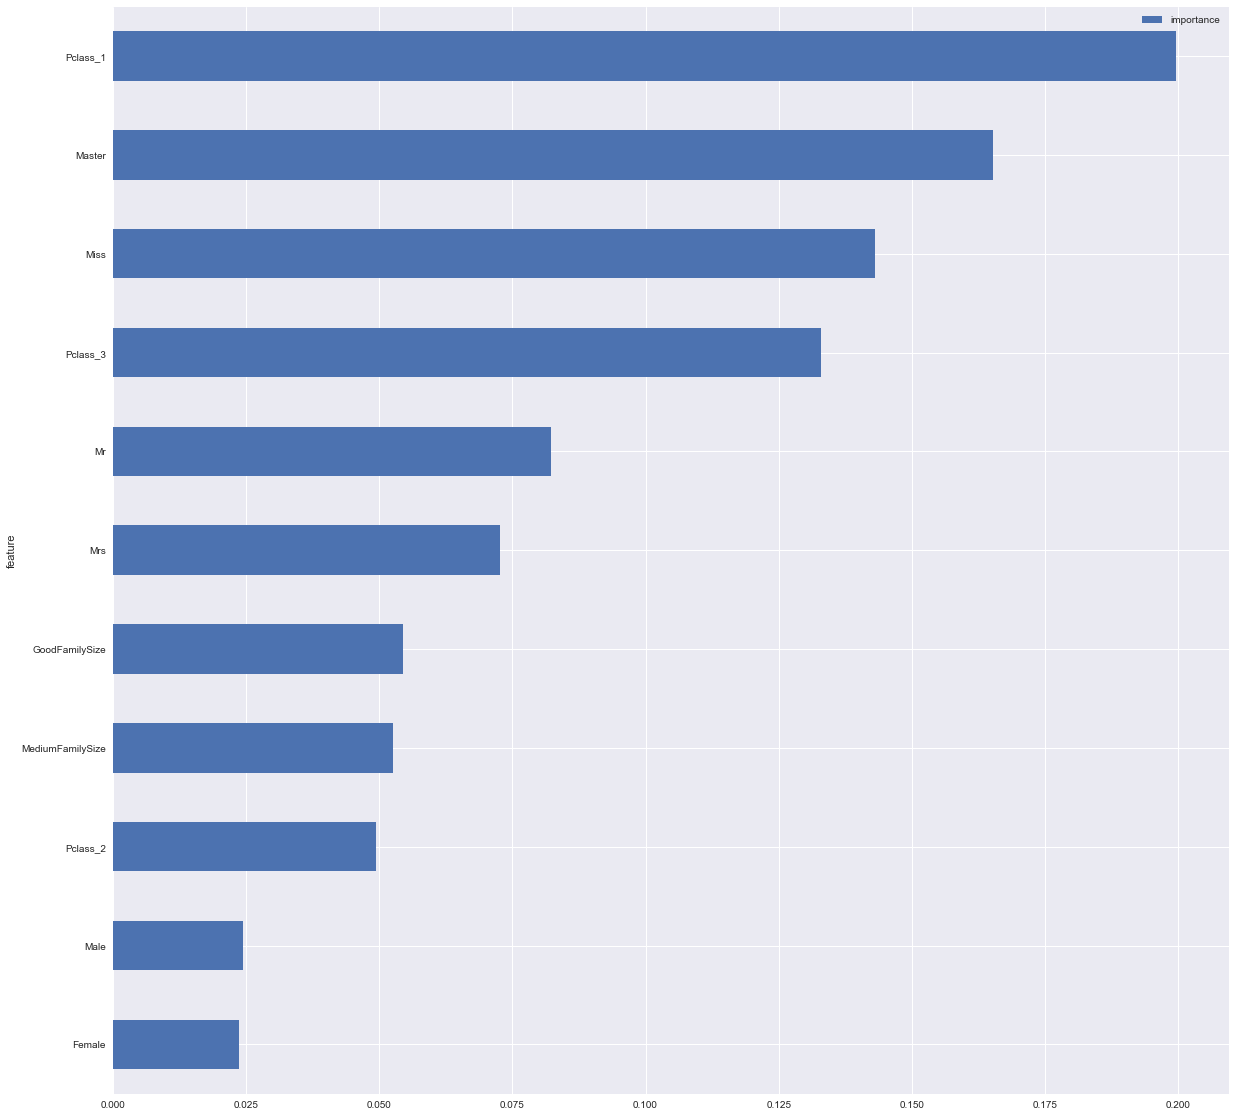

In [1032]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [1033]:
for dataset in combine:
    for i in dataset[dataset['Age'].isnull()].index:
        pred = clf.predict(np.matrix(dataset.loc[i, predict_age_features]))
        if pred == 0:
            dataset.loc[i, 'Age'] = 16
        elif pred == 1:
            dataset.loc[i, 'Age'] = 28
        else:
            dataset.loc[i, 'Age'] = 46

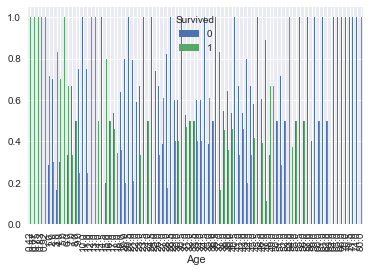

In [1034]:
tab = pd.crosstab(train_df['Age'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [1204]:
for dataset in combine:
    dataset.loc[(dataset['Title'] == 'Master') & (dataset['Age'].isnull()), 'Age'] = 4
    dataset.loc[(dataset['Title'] == 'Miss') & (dataset['Age'].isnull()), 'Age'] = 22
    dataset.loc[(dataset['Title'] == 'Mr') & (dataset['Age'].isnull()), 'Age'] = 29
    dataset.loc[(dataset['Title'] == 'Mrs') & (dataset['Age'].isnull()), 'Age'] = 35
    dataset.loc[(dataset['Title'] == 'Rare') & (dataset['Age'].isnull()), 'Age'] = 47

In [1205]:
train_df.groupby(['Title'])['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.0
Rare      48.0
Name: Age, dtype: float64

# Name

In [1037]:
from collections import Counter
train_df['LastName'] = train_df['Name'].str.extract(r'\.(.*)', expand=True)
train_df['LastName'] = train_df['LastName'].str.extract(r'([^\(\) ]+)', expand=True)
last_name_counter = Counter(train_df['LastName'])
train_df['LastNameCount'] = train_df['LastName'].apply(lambda x: last_name_counter[x])

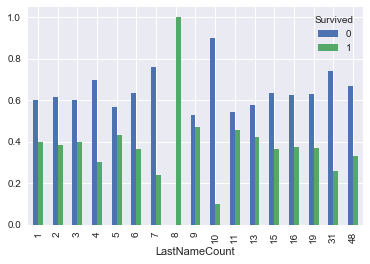

In [1038]:
tab = pd.crosstab(train_df['LastNameCount'], train_df['Survived'])
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar')

In [1039]:
unlucky_last_names = []
for i in [4, 7, 10, 31, 48]:
    names = list(set(train_df[train_df['LastNameCount'] == i]['LastName']))
    for n in names:
        unlucky_last_names.append(n)

In [1040]:
for dataset in combine:
    dataset['LastName'] = dataset['Name'].str.extract(r'\.(.*)', expand=True)
    dataset['LastName'] = dataset['LastName'].str.extract(r'([^\(\) ]+)', expand=True)
    dataset['LuckyLastName'] = dataset['LastName'].apply(lambda x: x=='Elizabeth')
    dataset['UnluckyLastName'] = dataset['LastName'].apply(lambda x: x in unlucky_last_names)

In [1260]:
# Machine Learning

features = ['Pclass_3',
            'Male', 'Female',
            'IntFare', 'Age',
            'Mr', 'Master', 'Rare',
            'GoodFamilySize', 'BadFamilySize',
           'GoodCabin', 'BadCabin',
            'GoodTicketType', 'BadTicketType',
            'Embarked_S']
X_train = train_df[features]
Y_train = train_df['Survived']
X_test = test_df[features]

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = cross_val_score(logreg, X_train, Y_train, cv=10).mean()


# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = cross_val_score(svc, X_train, Y_train, cv=10).mean()


# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = cross_val_score(knn, X_train, Y_train, cv=10).mean()


# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = cross_val_score(gaussian, X_train, Y_train, cv=10).mean()


# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
acc_perceptron = cross_val_score(perceptron, X_train, Y_train, cv=10).mean()


# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = cross_val_score(linear_svc, X_train, Y_train, cv=10).mean()


# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = cross_val_score(decision_tree, X_train, Y_train, cv=10).mean()

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = cross_val_score(random_forest, X_train, Y_train, cv=10).mean()


# Gradient Boosting

gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train, Y_train)
gradient_boosting.score(X_train, Y_train)
acc_gradient_boosting = cross_val_score(gradient_boosting, X_train, Y_train, cv=10).mean()



models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
               'Linear SVC', 
              'Decision Tree' , 'GradientBoosting'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_linear_svc, acc_decision_tree, acc_gradient_boosting]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,GradientBoosting,0.844042
2,Logistic Regression,0.823829
0,Support Vector Machines,0.813729
3,Random Forest,0.802493
1,KNN,0.796925
6,Linear SVC,0.783391
7,Decision Tree,0.778996
4,Naive Bayes,0.718420
5,Perceptron,0.520194


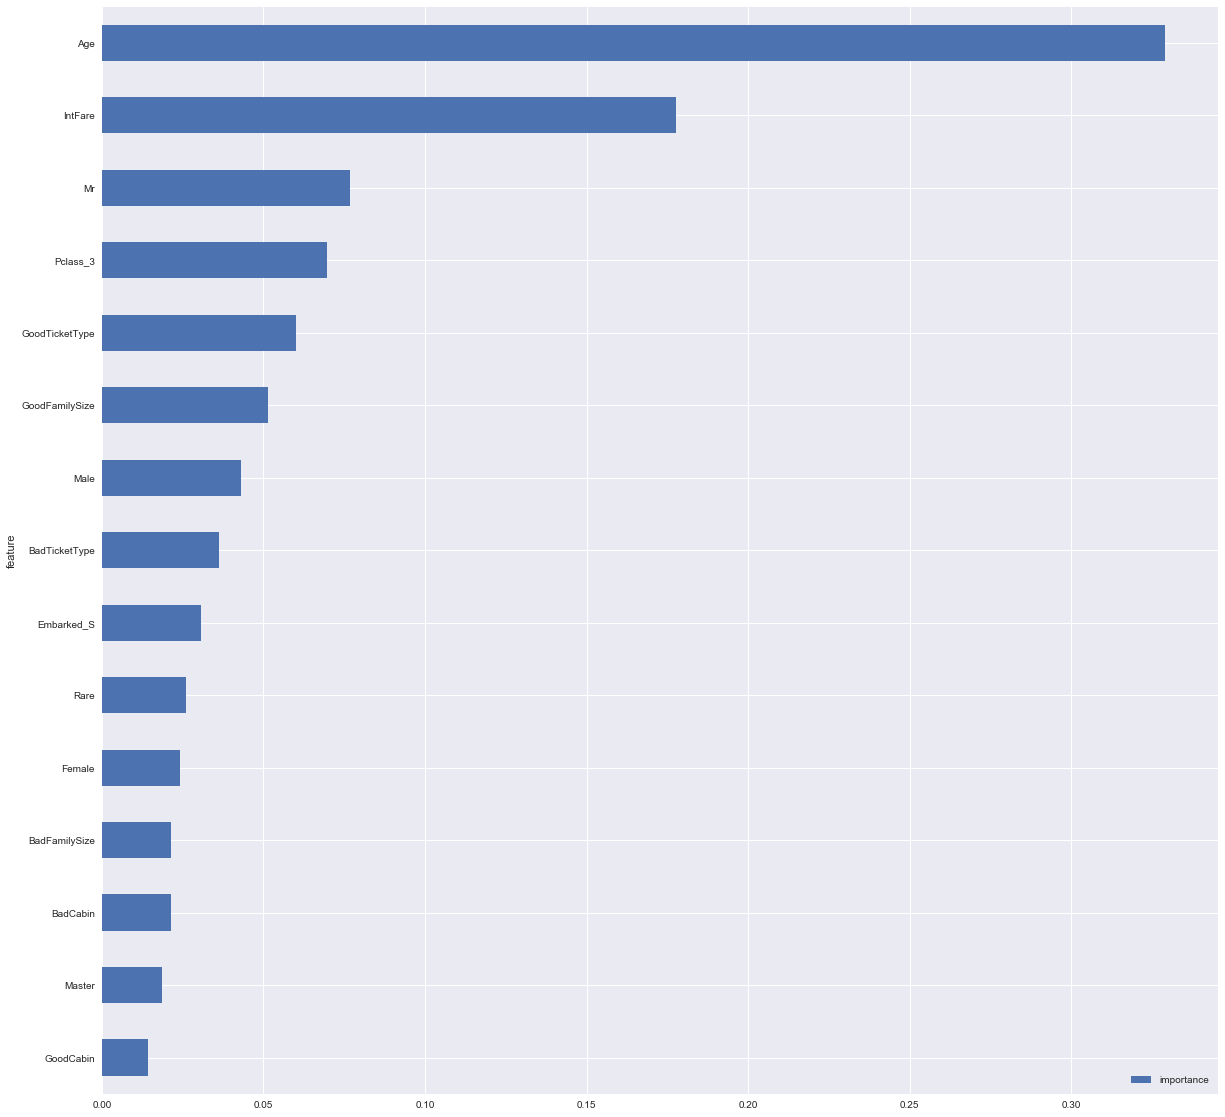

In [1261]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = gradient_boosting.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [1256]:
Y_pred = gradient_boosting.predict(X_test)

In [1257]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)